In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('SVR_WithTime_Offset_1_Trial_1.csv', header=0)
trial2_results = pd.read_csv('SVR_WithTime_Offset_1_Trial_2.csv', header=0)
trial3_results = pd.read_csv('SVR_WithTime_Offset_1_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,1.0,8.1708,2900.0
4,5.0,1.0,7.3963,3800.0
...,...,...,...,...
3001,3002.0,0.0,1.5106,669600.0
3002,3003.0,4.0,1.5106,669100.0
3003,3004.0,4.0,1.5106,668600.0
3004,3005.0,4.0,1.5106,668100.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,1.0,8.8565,1800.0
3,4.0,1.0,8.0982,2700.0
4,5.0,1.0,7.2167,3600.0
...,...,...,...,...
3001,3002.0,1.0,1.3438,600300.0
3002,3003.0,5.0,1.3438,599800.0
3003,3004.0,5.0,1.3438,599300.0
3004,3005.0,5.0,1.3438,598800.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,0.0,8.6319,3000.0
4,5.0,0.0,6.2580,4000.0
...,...,...,...,...
3001,3002.0,0.0,7.0588,609500.0
3002,3003.0,1.0,6.1888,610400.0
3003,3004.0,1.0,5.0041,611300.0
3004,3005.0,5.0,5.0041,610800.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,900.0,1000.0
2,2000.0,1800.0,2000.0
3,2900.0,2700.0,3000.0
4,3800.0,3600.0,4000.0
...,...,...,...
2995,669600.0,597800.0,609500.0
2996,669100.0,598700.0,609000.0
2997,668600.0,599500.0,608500.0
2998,668100.0,599000.0,608000.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,900.0,1000.0,966.666667
2,2000.0,1800.0,2000.0,1933.333333
3,2900.0,2700.0,3000.0,2866.666667
4,3800.0,3600.0,4000.0,3800.000000
...,...,...,...,...
2995,669600.0,597800.0,609500.0,625633.333333
2996,669100.0,598700.0,609000.0,625600.000000
2997,668600.0,599500.0,608500.0,625533.333333
2998,668100.0,599000.0,608000.0,625033.333333


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,900.0,1000.0,966.666667,57.735027
2,2000.0,1800.0,2000.0,1933.333333,115.470054
3,2900.0,2700.0,3000.0,2866.666667,152.752523
4,3800.0,3600.0,4000.0,3800.000000,200.000000
...,...,...,...,...,...
2995,669600.0,597800.0,609500.0,625633.333333,38523.023419
2996,669100.0,598700.0,609000.0,625600.000000,38022.493343
2997,668600.0,599500.0,608500.0,625533.333333,37567.317356
2998,668100.0,599000.0,608000.0,625033.333333,37567.317356


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 966.6666666666666,
 1933.3333333333333,
 2866.6666666666665,
 3800.0,
 4700.0,
 4633.333333333333,
 4600.0,
 4566.666666666667,
 4533.333333333333,
 4466.666666666667,
 4800.0,
 5266.666666666667,
 6100.0,
 6033.333333333333,
 5966.666666666667,
 6400.0,
 7266.666666666667,
 8100.0,
 8933.333333333334,
 8433.333333333334,
 8900.0,
 8866.666666666666,
 9333.333333333334,
 9800.0,
 9800.0,
 9800.0,
 9800.0,
 10266.666666666666,
 10700.0,
 11033.333333333334,
 11533.333333333334,
 11966.666666666666,
 11300.0,
 11133.333333333334,
 11433.333333333334,
 11233.333333333334,
 11500.0,
 10833.333333333334,
 10666.666666666666,
 10500.0,
 10333.333333333334,
 10166.666666666666,
 9966.666666666666,
 9300.0,
 9633.333333333334,
 8966.666666666666,
 8800.0,
 8633.333333333334,
 8433.333333333334,
 8733.333333333334,
 8566.666666666666,
 8400.0,
 9366.666666666666,
 9833.333333333334,
 9800.0,
 10266.666666666666,
 10533.333333333334,
 10766.666666666666,
 10866.666666666666,
 10533.333333

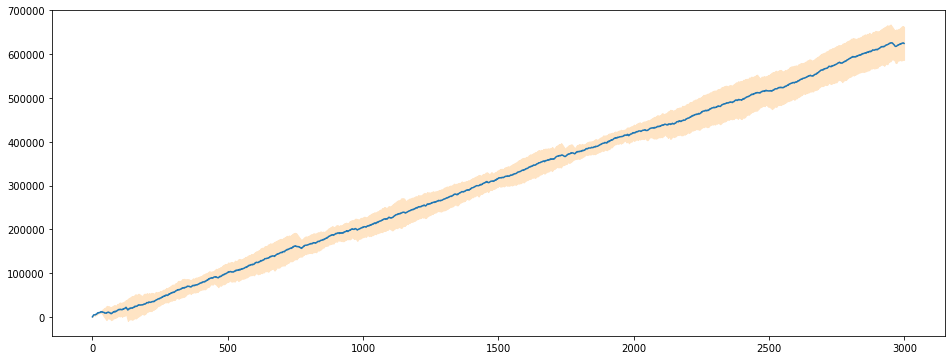

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 6.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 5.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 4.0,
 4.0,
 0.0,
 1.0,
 1.0,
 5.0,
 5.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 1.0,
 2.0,
 3.0,
 7.0,
 7.0,
 2.0,
 6.0,
 1.0,
 5.0,
 5.0,
 0.0,
 4.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 4.0,
 4.0,
 4.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 4.0,
 4.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 1.0,
 5.0,
 0.0,
 4.0,
 4.0,
 0.0,
 1.0,
 2.0,
 6.0,
 1.0,
 1.0,
 5.0,
 0.0,
 4.0,
 0.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0,
 4.0,
 0.0,
 4.0,
 4.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 4.0,
 0.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

16

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,0.0,8.4172,2000.0
3,4.0,1.0,8.1708,2900.0
4,5.0,1.0,7.3963,3800.0
...,...,...,...,...
2995,2996.0,0.0,4.6990,669600.0
2996,2997.0,4.0,4.6990,669100.0
2997,2998.0,4.0,4.6990,668600.0
2998,2999.0,4.0,4.6990,668100.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[625.0]

In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

0

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 0
Number of instances in trial2 in state 8: 0
Number of instances in trial1 in state 8: 0
Average number of instances in state 8: 0.0


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 14
Number of instances in trial2 in state 9: 17
Number of instances in trial1 in state 9: 19
Average number of instances in state 9: 16.666666666666668


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 1003 timesteps 0.3343 percentage of time in trial 1
Machine is in state 0 for 964 timesteps 0.3213 percentage of time in trial 2
Machine is in state 0 for 1006 timesteps 0.3353 percentage of time in trial 3
Machine is in state 0 for 991.0000 timesteps 0.3303 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 403 timesteps 0.1343 percentage of time in trial 1
Machine is in state 1 for 388 timesteps 0.1293 percentage of time in trial 2
Machine is in state 1 for 380 timesteps 0.1267 percentage of time in trial 3
Machine is in state 1 for 390.3333 timesteps 0.1301 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 108 timesteps 0.0360 percentage of time in trial 1
Machine is in state 2 for 116 timesteps 0.0387 percentage of time in trial 2
Machine is in state 2 for 95 timesteps 0.0317 percentage of time in trial 3
Machine is in state 2 for 106.3333 timesteps 0.0354 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 17 timesteps 0.0057 percentage of time in trial 1
Machine is in state 3 for 23 timesteps 0.0077 percentage of time in trial 2
Machine is in state 3 for 20 timesteps 0.0067 percentage of time in trial 3
Machine is in state 3 for 20.0000 timesteps 0.0067 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 798 timesteps 0.2660 percentage of time in trial 1
Machine is in state 4 for 790 timesteps 0.2633 percentage of time in trial 2
Machine is in state 4 for 861 timesteps 0.2870 percentage of time in trial 3
Machine is in state 4 for 816.3333 timesteps 0.2721 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 408 timesteps 0.1360 percentage of time in trial 1
Machine is in state 5 for 450 timesteps 0.1500 percentage of time in trial 2
Machine is in state 5 for 378 timesteps 0.1260 percentage of time in trial 3
Machine is in state 5 for 412.0000 timesteps 0.1373 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 133 timesteps 0.0443 percentage of time in trial 1
Machine is in state 6 for 127 timesteps 0.0423 percentage of time in trial 2
Machine is in state 6 for 98 timesteps 0.0327 percentage of time in trial 3
Machine is in state 6 for 119.3333 timesteps 0.0398 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 19 timesteps 0.0063 percentage of time in trial 1
Machine is in state 7 for 39 timesteps 0.0130 percentage of time in trial 2
Machine is in state 7 for 26 timesteps 0.0087 percentage of time in trial 3
Machine is in state 7 for 28.0000 timesteps 0.0093 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 1 timesteps 0.0003 percentage of time in trial 1
Machine is in state 8 for 6 timesteps 0.0020 percentage of time in trial 2
Machine is in state 8 for 4 timesteps 0.0013 percentage of time in trial 3
Machine is in state 8 for 3.6667 timesteps 0.0012 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 110 timesteps 0.0367 percentage of time in trial 1
Machine is in state 9 for 97 timesteps 0.0323 percentage of time in trial 2
Machine is in state 9 for 132 timesteps 0.0440 percentage of time in trial 3
Machine is in state 9 for 113.0000 timesteps 0.0377 percentage of time on average
